### Seven Supervised Machine Learning Models - Mushroom Classification dataset

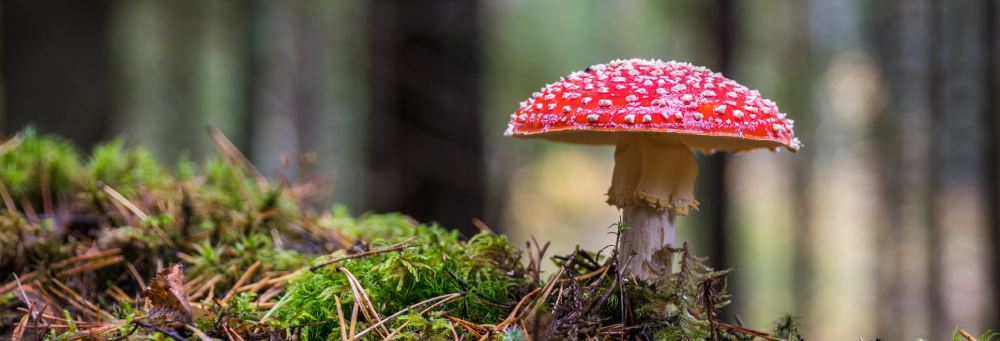

#### Supervised Machine learning models used
- Logistic Regression
- Decision Tree
- K Nearest Neighbor
- Bagging Model
- Random Forest
- Naive Bayes
- Support Vector Machine

#### Objective
- The objective is to classify whether the mushroom is edible or poisonous by it's various features. 

#### Dataset source & brief
- The dataset has been sourced from Kaggle.
- It includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Here the target variable is 'class'.

#### Import the libraries

In [1]:
import os
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Load and read the dataset

In [2]:
df=pd.read_csv(r"C:\Data Science course\All Projects\ML Project\ML Project.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Basic info about the dataset

In [3]:
df.shape  #check shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()   # check missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.duplicated().sum()  #check duplicate values

0

In [7]:
df.describe().T   #statistical summary

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df['class'].value_counts()   # check balance of Target variable 

e    4208
p    3916
Name: class, dtype: int64

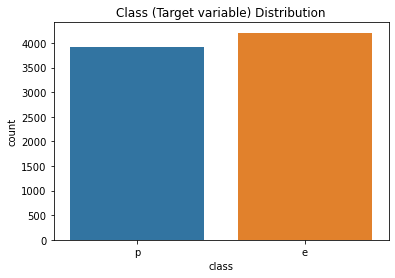

In [9]:
sns.countplot(x='class',  data=df)
plt.title('Class (Target variable) Distribution')
plt.show()

In [10]:
for i in df.columns:
    print("----------------------", i ,
         "-----------------------")
    print()
    print(set(df[i].tolist()))
    print()

---------------------- class -----------------------

{'p', 'e'}

---------------------- cap-shape -----------------------

{'s', 'b', 'f', 'x', 'c', 'k'}

---------------------- cap-surface -----------------------

{'s', 'f', 'g', 'y'}

---------------------- cap-color -----------------------

{'b', 'g', 'n', 'p', 'e', 'r', 'w', 'y', 'c', 'u'}

---------------------- bruises -----------------------

{'t', 'f'}

---------------------- odor -----------------------

{'a', 's', 'm', 'p', 'n', 'f', 'l', 'y', 'c'}

---------------------- gill-attachment -----------------------

{'a', 'f'}

---------------------- gill-spacing -----------------------

{'w', 'c'}

---------------------- gill-size -----------------------

{'b', 'n'}

---------------------- gill-color -----------------------

{'b', 'p', 'g', 'n', 'e', 'w', 'o', 'r', 'y', 'h', 'u', 'k'}

---------------------- stalk-shape -----------------------

{'t', 'e'}

---------------------- stalk-root -----------------------

{'b', 'e', 'r

In [11]:
# Dropping 'veil-type' as it has only one unique value 
df=df.drop(['veil-type'],axis=1)

#### Encoding

In [12]:
# encode categorical columns
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


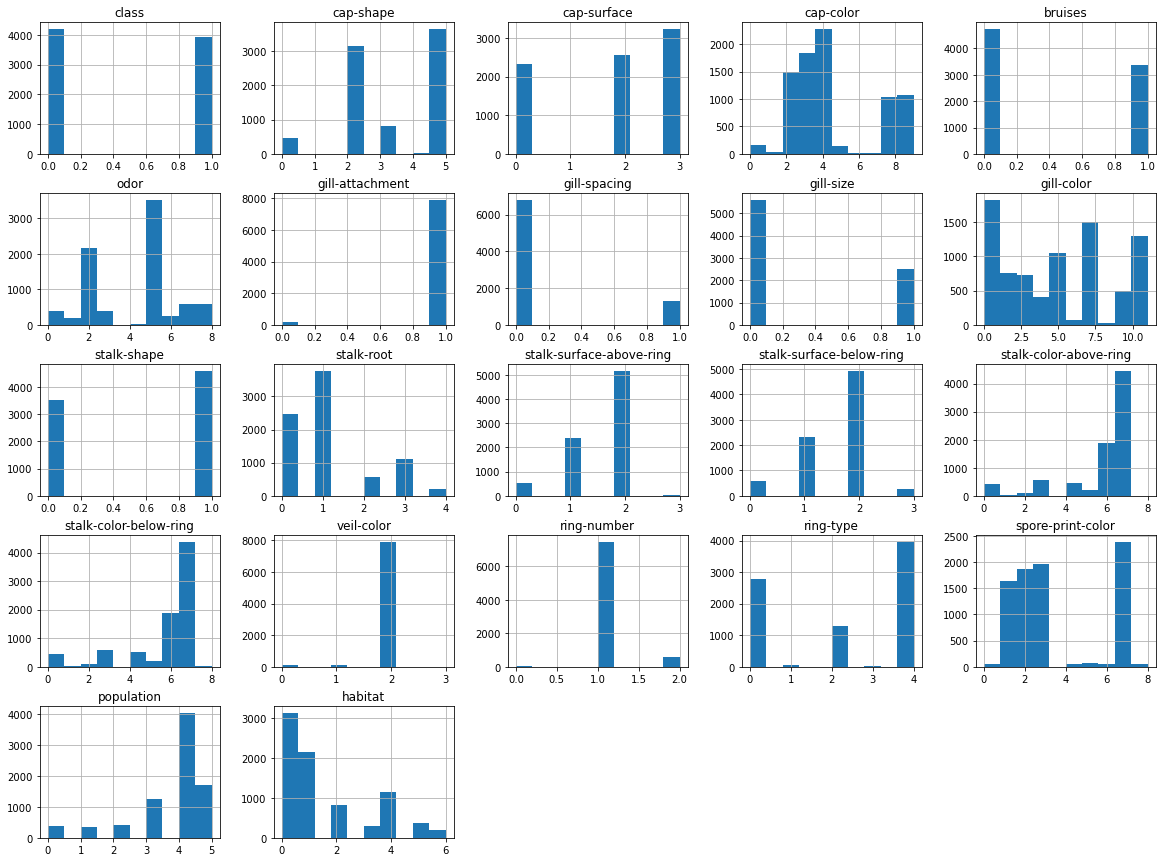

In [13]:
df.hist(figsize=(20,15))
plt.show()

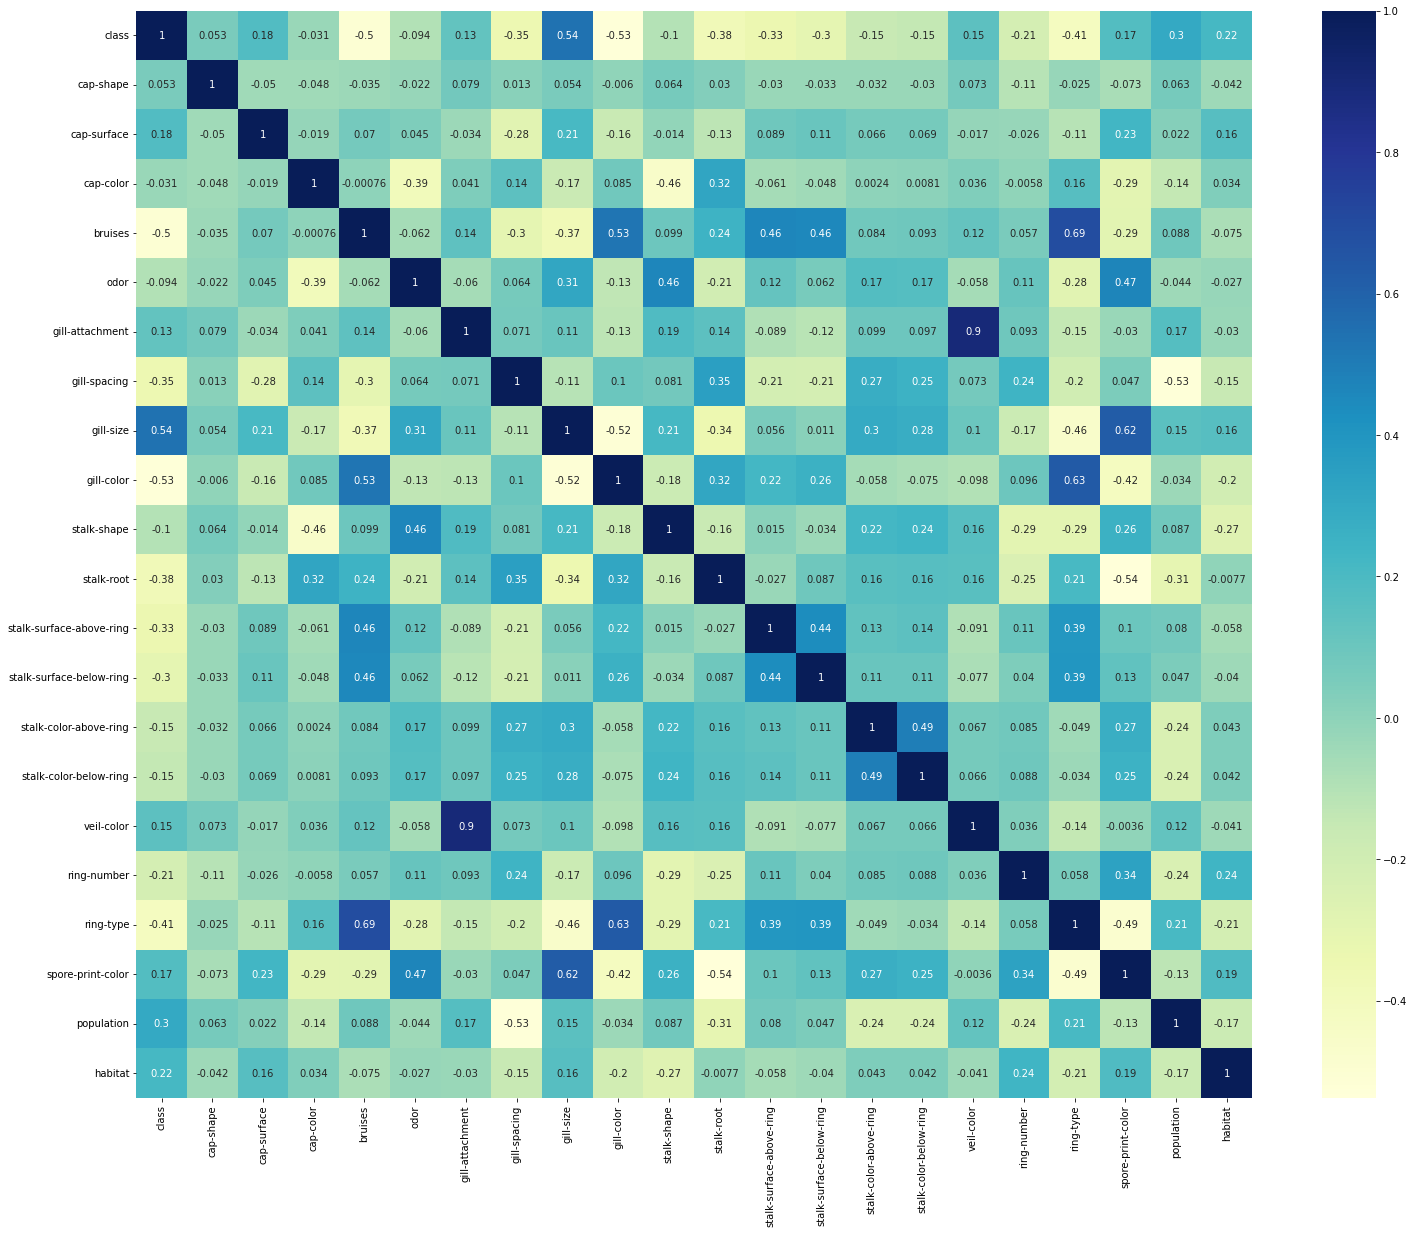

In [14]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')  # Correlation by using Heatmap 
plt.show()

#### Data Splitting

In [15]:
# Split data into independent and dependent
x = df.drop(['class'],axis=1)
y = df[['class']]

In [16]:
x.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1


In [17]:
y.head(2)

,class
0,1
1,0


#### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
fs=sc.fit_transform(x)
pd.DataFrame(fs).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [19]:
# Split data into Train & Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6499, 21), (1625, 21), (6499, 1), (1625, 1))

#### Building Model

#### 1. Logistic Regression Model

In [21]:
# Model building
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=100)
logit.fit(x_train, y_train)

# Predict 
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

# Evaluate
print('Logistic regression - Train accuracy:', accuracy_score(y_train, y_pred_train_logit))
print('---------------'*5)
print('Logistic regression - Test accuracy:', accuracy_score(y_test, y_pred_test_logit))

Logistic regression - Train accuracy: 0.9518387444222188
---------------------------------------------------------------------------
Logistic regression - Test accuracy: 0.9556923076923077


In [22]:
# Cross validation
training_accuracy = cross_val_score(logit,x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit,x_test, y_test, cv=10)
print('Logistic regression after Cross validation Train accuracy:', training_accuracy.mean())
print('---------------'*5)
print('Logistic regression after Cross validation Test accuracy:', test_accuracy.mean())

Logistic regression after Cross validation Train accuracy: 0.9504541898779187
---------------------------------------------------------------------------
Logistic regression after Cross validation Test accuracy: 0.9452624403544648


#### Conclusion - Logistic Regression
- Logistic regression both Train & Test  accuracy is coming at 95%.
- Though after Cross validation Train accuracy is coming at 95% & Test accuracy at 94%.

#### 2. Decision Tree Model

In [23]:
# Model building
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree=DecisionTreeClassifier(criterion ='gini')
dtree.fit(x_train,y_train)

#Predict
y_pred_train_dtree=dtree.predict(x_train)
y_pred_test_dtree=dtree.predict(x_test)

# Evaluate
print('Decision Tree - Train accuracy:', accuracy_score(y_train, y_pred_train_dtree))
print('---------------'*5)
print('Decision Tree - Test accuracy:', accuracy_score(y_test, y_pred_test_dtree))

Decision Tree - Train accuracy: 1.0
---------------------------------------------------------------------------
Decision Tree - Test accuracy: 1.0


#### Feature importance 

In [24]:
# Check Feature importance
dtree.feature_importances_
pd.DataFrame(index=x.columns,data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
cap-shape,0.000000
cap-surface,0.000000
cap-color,0.003446
bruises,0.034236
odor,0.000000
gill-attachment,0.000000
gill-spacing,0.000000
gill-size,0.121509
gill-color,0.343691
stalk-shape,0.023943


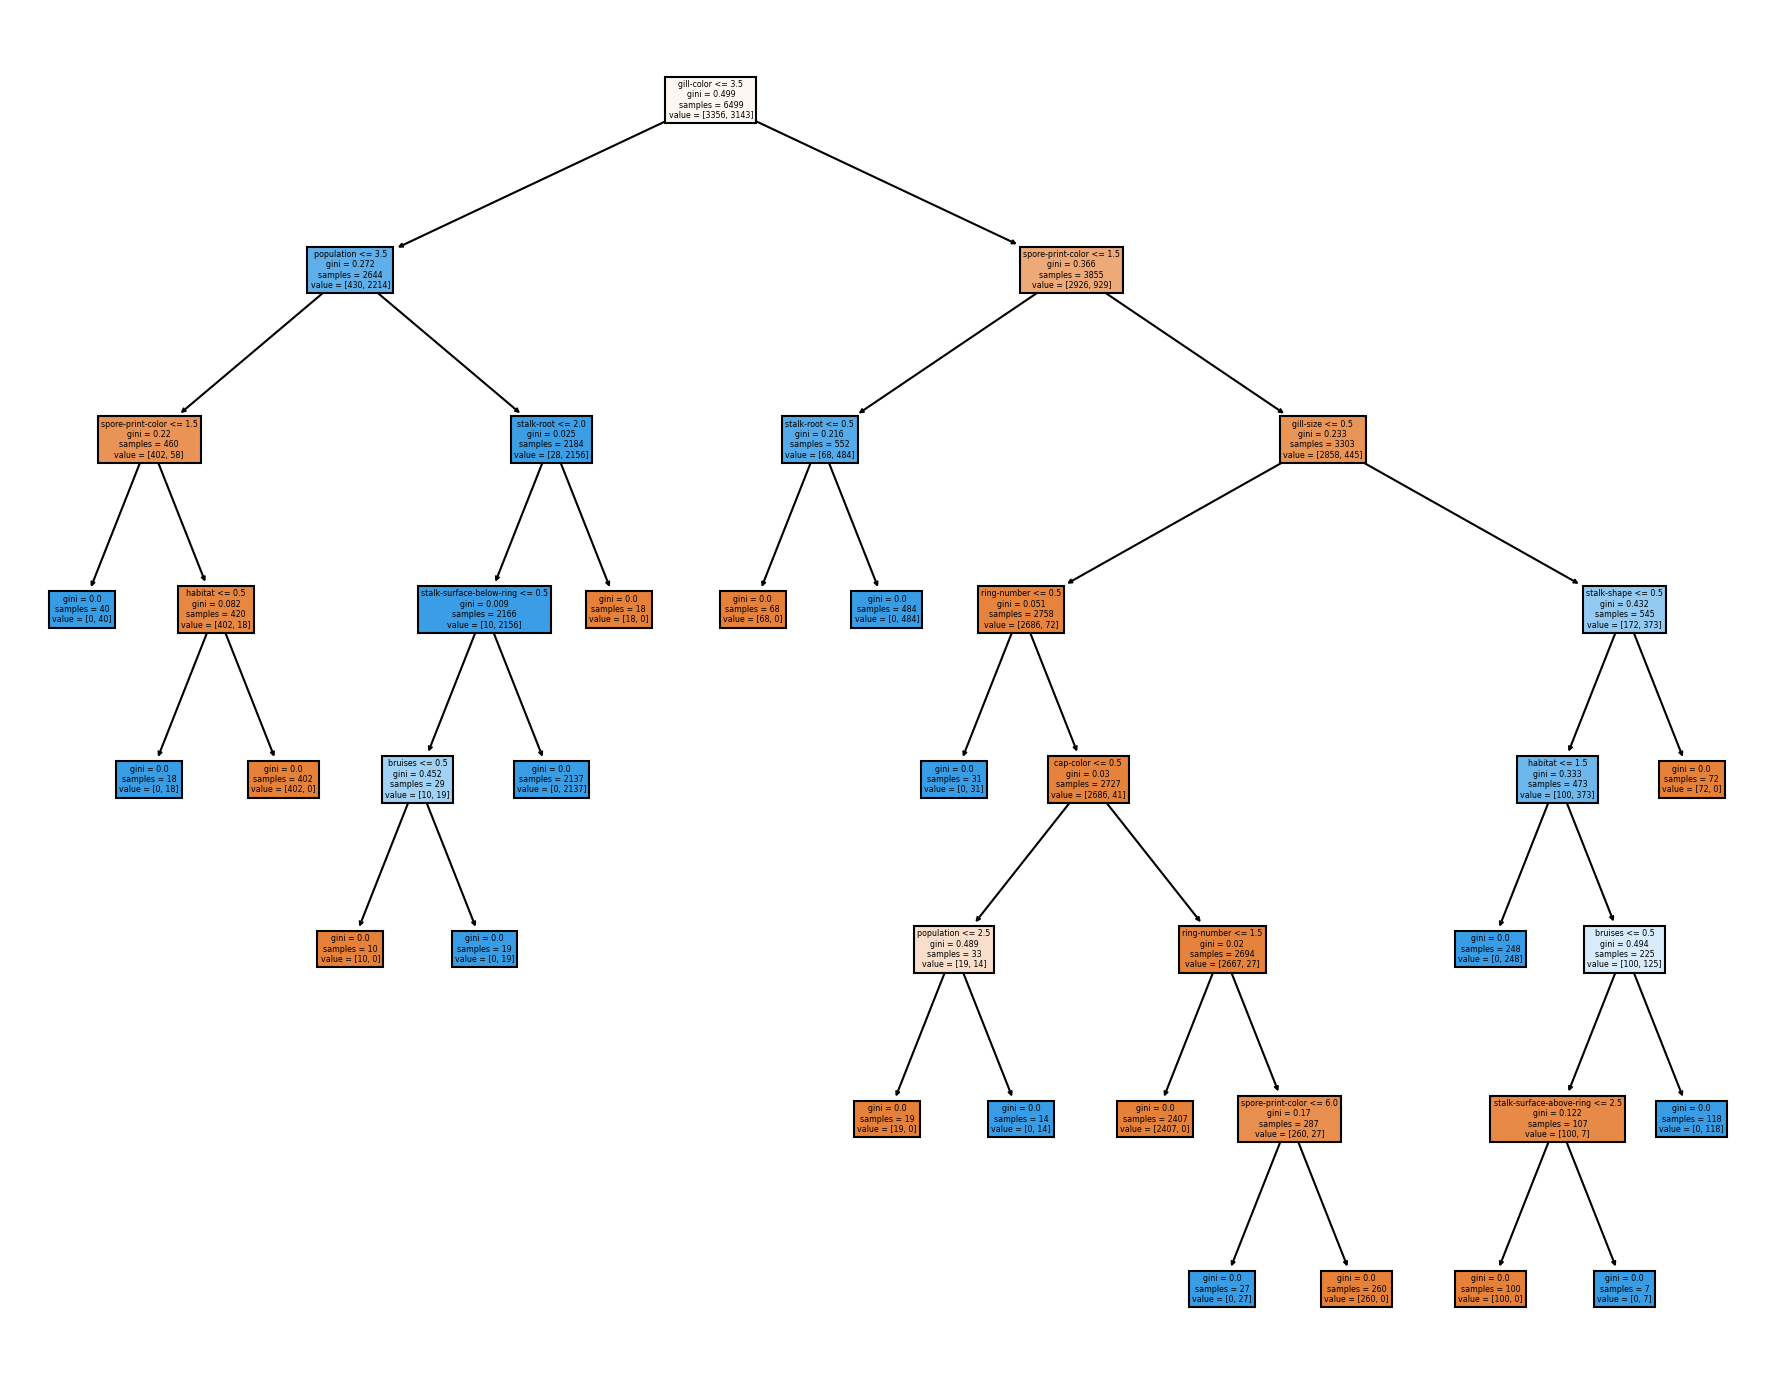

In [25]:
#Visualization 
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12),dpi=150)
plot_tree(dtree,filled=True,feature_names=x.columns)
plt.show()

In [26]:
# Using Post prunning method to handle overfitting probelm
def report_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(15,12),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

In [27]:
# max depth at 4
prunned_dtree=DecisionTreeClassifier(max_depth=4)
prunned_dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       852
           1       0.97      0.99      0.98       773

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625





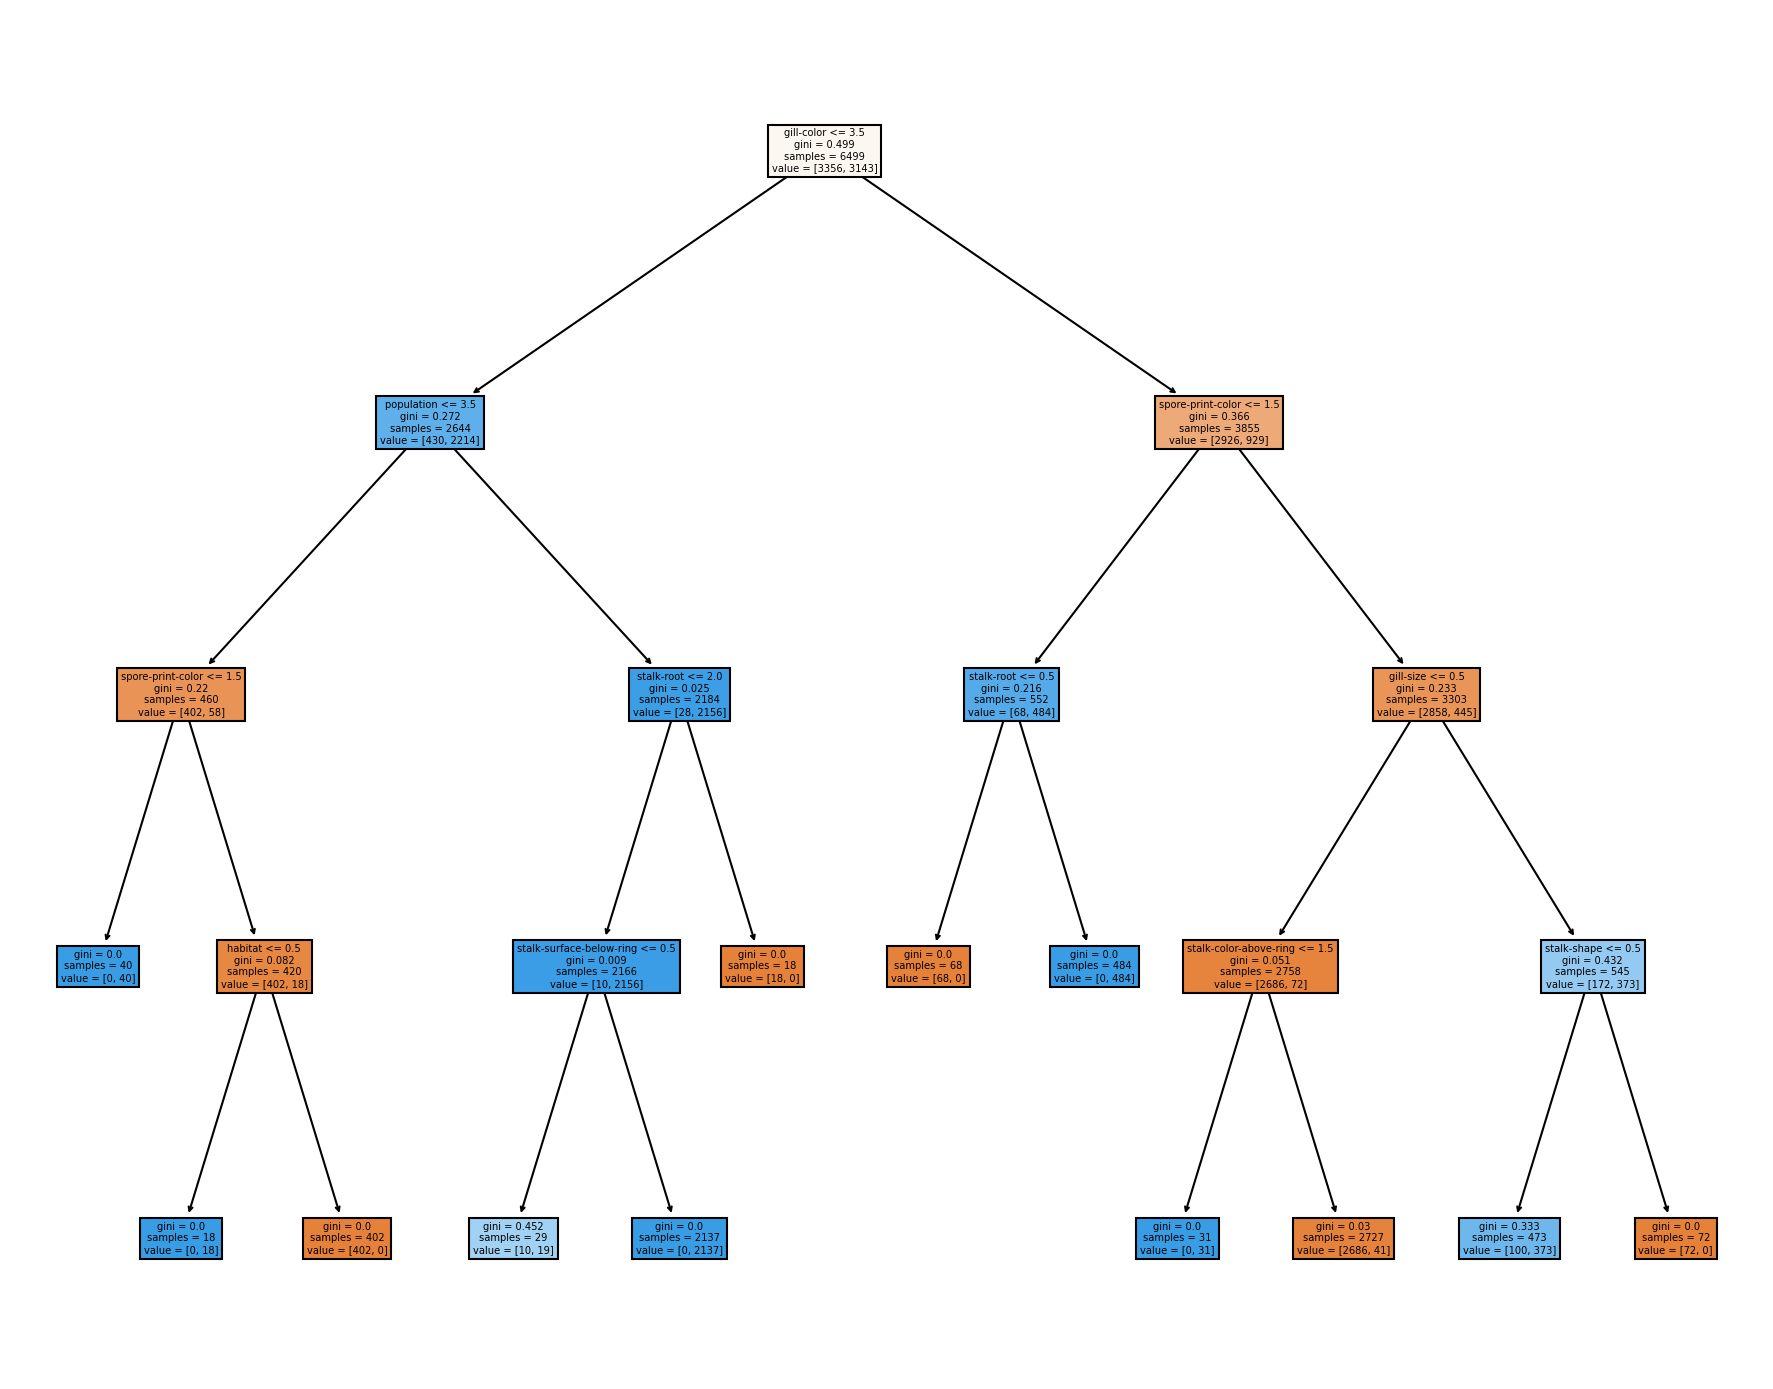

In [28]:
report_model(prunned_dtree)

In [29]:
y_pred_prunned_train=prunned_dtree.predict(x_train)
y_pred_prunned_test=prunned_dtree.predict(x_test)

print('Decision Tree post prunning- Train accuracy:',accuracy_score(y_train,y_pred_prunned_train))
print('---------------'*5)
print('Decision Tree post prunning- Test accuracy:', accuracy_score(y_test,y_pred_prunned_test))

Decision Tree post prunning- Train accuracy: 0.9767656562548084
---------------------------------------------------------------------------
Decision Tree post prunning- Test accuracy: 0.9821538461538462


#### Conclusion - Decision Tree 
- Both Train and Test accuracy is coming at 100% before prunning which shows it has overfitting problem.
- After giving max depth of 4, post prunning train data accuracy is of 97% and test data accuracy of 98% thus solving the problem of overfitting.

#### 3. K Nearest Neighbor Model

In [30]:
# Model building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

print('K Nearest Neighbor - Train accuracy:', accuracy_score(y_train, y_pred_train_knn))
print('---------------'*5)
print('K Nearest Neighbor - Test accuracy:', accuracy_score(y_test, y_pred_test_knn))

K Nearest Neighbor - Train accuracy: 0.9996922603477458
---------------------------------------------------------------------------
K Nearest Neighbor - Test accuracy: 0.9969230769230769


In [31]:
# Cross validation
training_accuracy = cross_val_score(knn,x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn,x_test, y_test, cv=10)
print('K Nearest Neighbor after Cross validation Train accuracy:', training_accuracy.mean())
print('---------------'*5)
print('K Nearest Neighbor after Cross validation Test accuracy:', test_accuracy.mean())

K Nearest Neighbor after Cross validation Train accuracy: 0.9981533720516772
---------------------------------------------------------------------------
K Nearest Neighbor after Cross validation Test accuracy: 0.9852533515110202


####  Conclusion - K Nearest Neighbor
- K Nearest Neigbor both Train & Test accuracy is coming at 99%.
- After Cross validation Train accuracy remains same & Test accuracy is at 98%

#### 4. Bagging Model

In [32]:
# Model building
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)# Predict

#Predict
y_pred_train_bag=bagging.predict(x_train)
y_pred_test_bag=bagging.predict(x_test)

# Evaluate
print('Bagging - Train accuracy:', accuracy_score(y_train, y_pred_train_bag))
print('---------------'*5)
print('Bagging - Test accuracy:', accuracy_score(y_test, y_pred_test_bag))

Bagging - Train accuracy: 1.0
---------------------------------------------------------------------------
Bagging - Test accuracy: 1.0


In [33]:
# Cross validation
training_accuracy = cross_val_score(bagging,x_train, y_train, cv=10)
test_accuracy = cross_val_score(bagging,x_test, y_test, cv=10)
print('Bagging after Cross validation Train accuracy:', training_accuracy.mean())
print('---------------'*5)
print('Bagging after Cross validation Test accuracy:', test_accuracy.mean())

Bagging after Cross validation Train accuracy: 1.0
---------------------------------------------------------------------------
Bagging after Cross validation Test accuracy: 0.998155722184352


####  Conclusion - Bagging
- Bagging both Train & Test accuracy is coming at 100% which means it has overfitting problem.
- After Cross validation Train accuracy remains same & Test accuracy is at 99%.

#### 5. Random Forest Model

In [34]:
# Model building
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,oob_score=False)
rf.fit(x_train,y_train)

# Predict
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

# Evaluate
print('Random Forest - Train accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('---------------'*5)
print('Random Forest - Test accuracy:', accuracy_score(y_test, y_pred_test_rf))

Random Forest - Train accuracy: 1.0
---------------------------------------------------------------------------
Random Forest - Test accuracy: 1.0


In [35]:
### Cross validation as it has overfitting problem
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print('Random Forest after Cross validation Train accuracy:', training_accuracy.mean())
print('---------------'*5)
print('Random Forest after Cross validation Test accuracy:', test_accuracy.mean())

Random Forest after Cross validation Train accuracy: 1.0
---------------------------------------------------------------------------
Random Forest after Cross validation Test accuracy: 0.9993827160493828


#### Conclusion - Random Forest
- Random Forest is yielding the same result as Bagging model

#### 6. Naive Bayes Model

In [36]:
# Model building
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict the model
y_pred_train_gnb = gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)

# Evaluate
print('Naive Bayes -Train accuracy:', accuracy_score(y_train, y_pred_train_gnb))
print('---------------'*5)
print('Naive Bayes -Test accuracy:', accuracy_score(y_test, y_pred_test_gnb))

Naive Bayes -Train accuracy: 0.9222957378058163
---------------------------------------------------------------------------
Naive Bayes -Test accuracy: 0.9156923076923077


In [37]:
# Cross validation
training_accuracy = cross_val_score(gnb,x_train, y_train, cv=10)
test_accuracy = cross_val_score(gnb,x_test, y_test, cv=10)
print('Naive Bayes after Cross validation Train accuracy:', training_accuracy.mean())
print('---------------'*5)
print('Naive Bayes after Cross validation Test accuracy:', test_accuracy.mean())

Naive Bayes after Cross validation Train accuracy: 0.9224494488562286
---------------------------------------------------------------------------
Naive Bayes after Cross validation Test accuracy: 0.8811255017798987


#### Conclusion - Gaussian Naive Bayes
- In Gaussian Naive Bayes model Train accuracy is coming at 92% and Test accuracy at 91%.
- After Cross validation Train accuracy is coming at 92% and Test accuracy at 88%. 

#### 7. Support Vector Machine Model

In [38]:
# a. Radial Basis Function Kernel (RBF) - (Defaut SVM) Model building
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)


#Predict
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

#Evaluate
print('Rbf - SVM - Train accuracy:', accuracy_score(y_train, y_pred_train_rbf))
print('------------------------'*5)
print('Rbf - SVM - Test accuracy:', accuracy_score(y_test, y_pred_test_rbf))

Rbf - SVM - Train accuracy: 0.9910755500846284
------------------------------------------------------------------------------------------------------------------------
Rbf - SVM - Test accuracy: 0.9907692307692307


In [39]:
# Cross validation
train_accuracy = cross_val_score(svm_rbf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_rbf, x_test, y_test, cv=10)
print('Rbf - SVM after Cross validation Train accuracy:', train_accuracy.mean())
print('------------------------'*5)
print('Rbf - SVM after Cross validation Test accuracy:', test_accuracy.mean())

Rbf - SVM after Cross validation Train accuracy: 0.989536328078701
------------------------------------------------------------------------------------------------------------------------
Rbf - SVM after Cross validation Test accuracy: 0.9649587215026887


#### Conclusion - SVM- Rbf
- In SVM - Rbf both Train & Test accuracy is coming at 99%
- After Cross validation Train accuracy is coming at 98% & Test accuracy at 96%.

In [40]:
# b. Linear Kernel Model building
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

#Predict
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

#Evaluate
print('Linear - SVM- Train accuracy:', accuracy_score(y_train, y_pred_train_linear))
print('------------------------'*5)
print('Linear - SVM- Test accuracy:', accuracy_score(y_test, y_pred_test_linear))

Linear - SVM- Train accuracy: 0.9804585320818587
------------------------------------------------------------------------------------------------------------------------
Linear - SVM- Test accuracy: 0.9809230769230769


In [41]:
# Cross validation
train_accuracy = cross_val_score(svm_linear, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_linear, x_test, y_test, cv=10)
print('Linear - SVM after Cross validation Train accuracy:', train_accuracy.mean())
print('------------------------'*5)
print('Linear - SVM after Cross validation Test accuracy:', test_accuracy.mean())

Linear - SVM after Cross validation Train accuracy: 0.9679945478250565
------------------------------------------------------------------------------------------------------------------------
Linear - SVM after Cross validation Test accuracy: 0.9440127243808225


#### Conclusion - SVM- Linear
- In SVM- Linear both Train & Test accuracy is coming at 98%
- After Cross validation Train accuracy is coming at 96% & Test accuracy at 94%.

In [42]:
# c. Polynomial Kernel Model building
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)


#Predict
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)


#Evaluate
print('Polynomial - SVM- Train accuracy:', accuracy_score(y_train, y_pred_train_poly))
print('------------------------'*5)
print('Polynomial - SVM- Test accuracy:', accuracy_score(y_test, y_pred_test_poly))

Polynomial - SVM- Train accuracy: 0.9987690413909832
------------------------------------------------------------------------------------------------------------------------
Polynomial - SVM- Test accuracy: 0.9981538461538462


In [43]:
# Cross validation
train_accuracy = cross_val_score(svm_poly, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_poly, x_test, y_test, cv=10)
print('Polynomial - SVM after Cross validation Train accuracy:', train_accuracy.mean())
print('------------------------'*5)
print('Polynomial - SVM after Cross validation Test accuracy:', test_accuracy.mean())

Polynomial - SVM after Cross validation Train accuracy: 0.9983076923076923
------------------------------------------------------------------------------------------------------------------------
Polynomial - SVM after Cross validation Test accuracy: 0.9883132621373931


#### Conclusion - SVM- Polynomial
- In SVM - Polynomial both Train & Test accuracy is coming at 99%
- After Cross validation Train accuracy is coming at 99% & Test accuracy at 98%.

#### Voting ensemble
- Voting is an ensemble method that combines the performances of multiple models to make predictions.
- In classification problems, there are two types of voting: hard voting and soft voting.
- Hard voting entails picking the prediction with the highest number of votes, whereas soft voting entails combining the probabilities of each prediction in each model and picking the prediction with the highest total probability.

In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
estimators = [('Logistic',logit),('Decision_tree', dtree),('KNN',knn),('Bagging',bagging), ('Randomforest',rf),
              ('NaiveBayes',gnb), ('SVM_RBF' ,svm_rbf),('SVM_Linear',svm_linear),('SVM_Poly', svm_poly)]

In [46]:
voting = VotingClassifier(estimators = estimators, voting='hard')
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(random_state=100)),
                             ('Decision_tree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('Randomforest',
                              RandomForestClassifier(n_estimators=200)),
                             ('NaiveBayes', GaussianNB()), ('SVM_RBF', SVC()),
                             ('SVM_Linear', SVC(kernel='linear')),
                             ('SVM_Poly', SVC(kernel='poly'))])

In [47]:
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)

In [48]:
print('Voting ensemble train accuracy:', accuracy_score(y_train, y_pred_train_voting))
print('---------------'*5)
print('Voting ensemble train accuracy:', accuracy_score(y_test, y_pred_test_voting))

Voting ensemble train accuracy: 0.9987690413909832
---------------------------------------------------------------------------
Voting ensemble train accuracy: 0.9987692307692307


#### Conclusion - Voting Ensemble
- Voting ensemble yielded train & test accuracy of 99%.

#### Final Conclusion -
- In Logistic regression model both Train & Test accuracy is coming at 95%. After Cross validation Train accuracy is coming at 95% & Test accuracy at 94%
- In Decision Tree model both Train and Test accuracy is coming at 100% before prunning which shows it has overfitting problem. After giving max depth of 4, post prunning train data accuracy is 97% and test data accuracy is 98% thus solving the problem of overfitting.
- In K Nearest Neigbor model both Train & Test accuracy is coming at 99%. After Cross validation Train accuracy remains same & Test accuracy is 98%.
- In Bagging model both Train & Test accuracy is coming at 100% which means it has overfitting problem. After Cross validation Train accuracy remains same & Test accuracy is at 99% which means overfitting problem still persists.
- Random Forest model is yielding the same result as Bagging model.
- In Gaussian Naive Bayes model Train accuracy is coming at 92% and Test accuracy at 91%. After Cross validation Train accuracy is coming at 92% and Test accuracy at 88%. 
- In Support Vector machine model I applied 3 different kernels- Rbf, Linear & Polynomial.
    - In SVM - Rbf both Train & Test accuracy is coming at 99%. After Cross validation Train accuracy is coming at 98% & Test accuracy at 96%.
    - In SVM- Linear both Train & Test accuracy is coming at 98%. After Cross validation Train accuracy is coming at 96% & Test accuracy at 94%.
    - In SVM - Polynomial both Train & Test accuracy is coming at 99%. After Cross validation Train accuracy is coming at 99% & Test accuracy at 98%.
- Voting ensemble yielded train & test accuracy of 99%.
- In all the above models except Gaussian Naive Bayes model both Train & Test data accuracy is coming over 90% against the commonly taken threshold accuracy value of 70%.
- In some models overfitting problem still persists.
- There is less than 10% accuracy variation between train & Test accuracy thus making almost all of them good model.
- So we can say that the above model solves our objective which is to classify whether the mushroom is edible or poisonous.